# Regression

### Part 1

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing()
X = data.data
y = data.target


X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)


### Part 2

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation ="relu", input_shape =( X_train.shape[1],)),
    Dense(32, activation = "relu"),
    Dense(1)
])


model.compile(optimizer="adam", loss="mse", metrics = ["mae"])

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 32)

Epoch 1/50
516/516 [==============================] - 3s 3ms/step - loss: 0.8382 - mae: 0.6082 - val_loss: 0.4465 - val_mae: 0.4773
Epoch 2/50
516/516 [==============================] - 1s 3ms/step - loss: 0.4040 - mae: 0.4533 - val_loss: 0.3978 - val_mae: 0.4483
Epoch 3/50
516/516 [==============================] - 2s 3ms/step - loss: 0.3650 - mae: 0.4307 - val_loss: 0.3702 - val_mae: 0.4288
Epoch 4/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3470 - mae: 0.4170 - val_loss: 0.3598 - val_mae: 0.4165
Epoch 5/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3349 - mae: 0.4075 - val_loss: 0.3465 - val_mae: 0.4098
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3243 - mae: 0.3998 - val_loss: 0.3470 - val_mae: 0.4103
Epoch 7/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3291 - mae: 0.3960 - val_loss: 0.3412 - val_mae: 0.4018
Epoch 8/50
516/516 [==============================] - 1s 2ms/step - loss: 0.

### Part 3

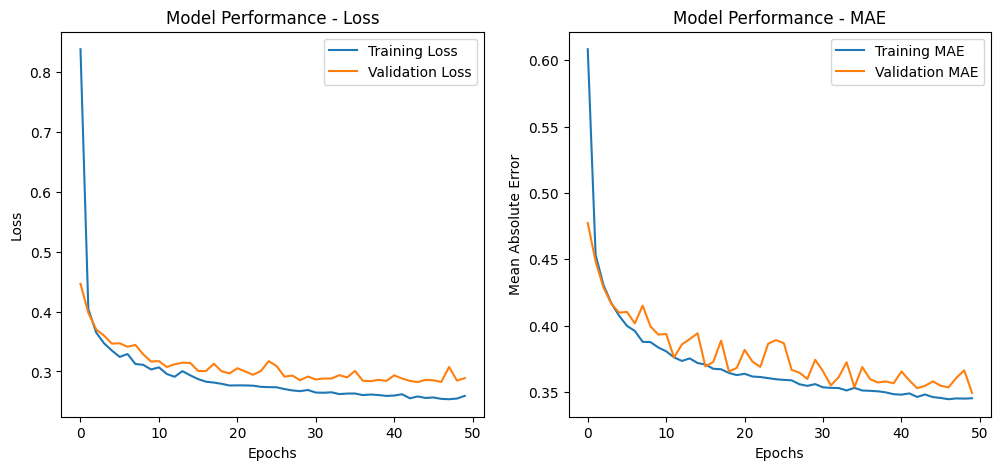

In [37]:
import matplotlib.pyplot as plt

# Plot the loss and MAE
def plot_history(history, title="Model Performance"):
    plt.figure(figsize=(12, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title(f'{title} - MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    
    plt.show()

plot_history(history)


### Part 4

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model_lr = Sequential([
    Dense(64, activation ="relu", input_shape =( X_train.shape[1],)),
    Dense(32, activation = "relu"),
    Dense(1)
])


model_lr.compile(optimizer=Adam(learning_rate = 0.001), loss="mse", metrics = ["mae"])

history_lr = model_lr.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 32)


Epoch 1/50
516/516 [==============================] - 2s 3ms/step - loss: 0.8760 - mae: 0.5900 - val_loss: 0.4356 - val_mae: 0.4602
Epoch 2/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3880 - mae: 0.4446 - val_loss: 0.4067 - val_mae: 0.4471
Epoch 3/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3656 - mae: 0.4292 - val_loss: 0.3761 - val_mae: 0.4277
Epoch 4/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3715 - mae: 0.4212 - val_loss: 0.3604 - val_mae: 0.4340
Epoch 5/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3359 - mae: 0.4080 - val_loss: 0.3439 - val_mae: 0.4073
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3257 - mae: 0.4004 - val_loss: 0.3425 - val_mae: 0.4061
Epoch 7/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3157 - mae: 0.3939 - val_loss: 0.3387 - val_mae: 0.3923
Epoch 8/50
516/516 [==============================] - 1s 2ms/step - loss: 0.

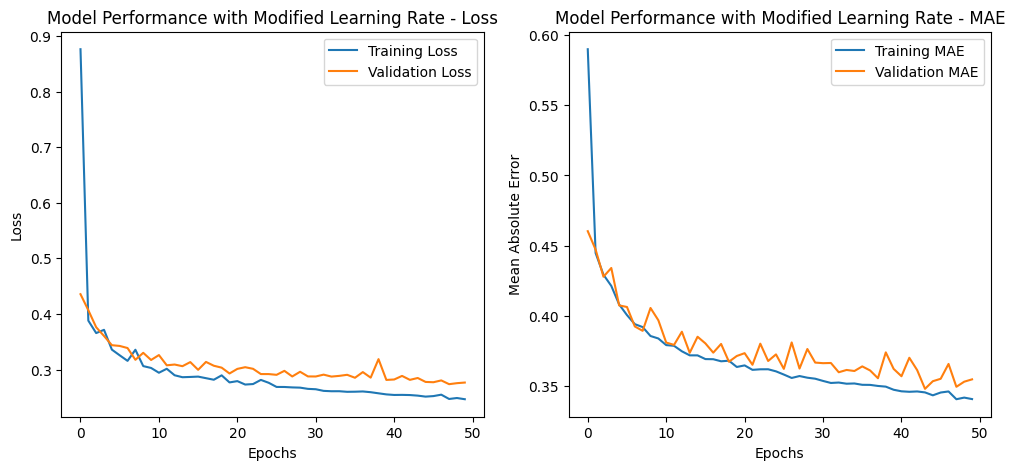

In [39]:
plot_history(history_lr, title="Model Performance with Modified Learning Rate")

### Part 5

In [40]:
model.save_weights('model_weight.h5')

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('best_model.h5', save_best_only = True, monitor = 'val_loss' )
Eaearly_Stopping = EarlyStopping(monitor='val_loss' ,patience = 10)


history_callbacks = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 32, callbacks=[checkpoint,Eaearly_Stopping])



Epoch 1/50
516/516 [==============================] - 1s 3ms/step - loss: 0.2538 - mae: 0.3432 - val_loss: 0.2991 - val_mae: 0.3909
Epoch 2/50
 64/516 [==>...........................] - ETA: 0s - loss: 0.2444 - mae: 0.3349

c:\Users\Jean\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


516/516 [==============================] - 1s 2ms/step - loss: 0.2517 - mae: 0.3421 - val_loss: 0.2779 - val_mae: 0.3523
Epoch 3/50
516/516 [==============================] - 1s 2ms/step - loss: 0.2519 - mae: 0.3441 - val_loss: 0.2820 - val_mae: 0.3614
Epoch 4/50
516/516 [==============================] - 1s 2ms/step - loss: 0.2491 - mae: 0.3405 - val_loss: 0.2828 - val_mae: 0.3498
Epoch 5/50
516/516 [==============================] - 1s 2ms/step - loss: 0.2476 - mae: 0.3400 - val_loss: 0.2799 - val_mae: 0.3527
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 0.2496 - mae: 0.3404 - val_loss: 0.2784 - val_mae: 0.3647
Epoch 7/50
516/516 [==============================] - 1s 2ms/step - loss: 0.2484 - mae: 0.3405 - val_loss: 0.2825 - val_mae: 0.3690
Epoch 8/50
516/516 [==============================] - 2s 3ms/step - loss: 0.2478 - mae: 0.3400 - val_loss: 0.2753 - val_mae: 0.3507
Epoch 9/50
516/516 [==============================] - 2s 3ms/step - loss: 0.2455 - mae:

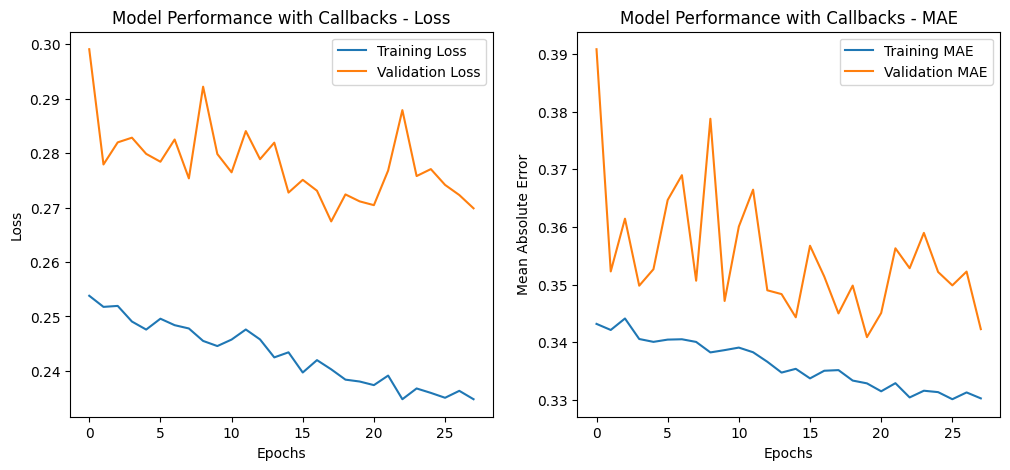

In [42]:
plot_history(history_callbacks, title="Model Performance with Callbacks")

### part 6 

In [43]:
model.save('regression_model.h5')

In [44]:
from tensorflow.keras.models import load_model

loaded_model = load_model('regression_model.h5')

loss, mae = loaded_model.evaluate(X_test, y_test)
print(f"Loaded Model Evaluation - Loss: {loss}, MAE: {mae}")

129/129 [==============================] - 0s 2ms/step - loss: 0.2699 - mae: 0.3422
Loaded Model Evaluation - Loss: 0.26985013484954834, MAE: 0.3422495126724243
